## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
df = pd.read_csv("C:/Users/MRE/Desktop/Data Engineering/Final/fifa_eda_stats.csv")
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


# Data Wrangling

## Missing Value Analysis & Filling Missing Values

In [3]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

I'm going to dropped **Loaned From**, **Joined features** from dataset. There is no specific impact while calculating Wage.

In [4]:
df.drop('Loaned From', axis=1, inplace=True)
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallContro

In [5]:
df.drop('Joined', axis=1, inplace=True)
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Accelerati

In [6]:
for column in df.columns:
    if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == object:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
df.isnull().sum()

C:\Users\MRE\AppData\Local\Temp/ipykernel_13360/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_13360/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_13360/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_13360/3315503910.py:2: DeprecationWar

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

## Standartization & Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

for col in numeric_cols:
    # Normalization
    df[col] = min_max_scaler.fit_transform(df[[col]])
    # Standardizationb
    df[col] = standard_scaler.fit_transform(df[[col]])
    
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,-1.878072,L. Messi,1.258678,Argentina,4.018287,3.698092,FC Barcelona,€110.5M,€565K,Left,...,3.270147,-0.719159,-0.911222,-0.925466,-0.599836,-0.318445,-0.073911,-0.139573,-0.484898,€226.5M
1,-6.457570,Cristiano Ronaldo,1.686961,Portugal,4.018287,3.698092,Juventus,€77M,€405K,Right,...,3.182588,-0.970671,-0.772577,-1.066557,-0.543255,-0.318445,-0.073911,-0.139573,-0.317611,€127.1M
2,-0.781839,Neymar Jr,0.187972,Brazil,3.728799,3.535128,Paris Saint-Germain,€118.5M,€290K,Right,...,3.095030,-1.020973,-1.096081,-0.596255,-0.430094,-0.436883,-0.073911,-0.080798,-0.317611,€228.1M
3,-0.708118,De Gea,0.402113,Spain,3.584055,3.535128,Manchester United,€72M,€260K,Right,...,0.818511,-1.624602,-1.234726,-1.536858,4.152944,4.063781,4.294272,4.209793,4.310642,€138.6M
4,-0.711288,K. De Bruyne,0.402113,Belgium,3.584055,3.372164,Manchester City,€102M,€355K,Right,...,2.569679,1.041426,0.475223,0.250288,-0.090609,-0.200006,-0.680603,-0.374674,-0.206087,€196.4M
5,-1.035272,E. Hazard,0.402113,Belgium,3.584055,3.209200,Chelsea,€93M,€340K,Right,...,2.832355,-0.668856,-0.957437,-1.113587,-0.316932,-0.259225,-0.619934,-0.492224,-0.484898,€172.1M
6,-1.244654,L. Modrić,1.472820,Croatia,3.584055,3.209200,Real Madrid,€67M,€420K,Right,...,2.219445,0.639007,1.307090,1.284951,-0.203771,-0.436883,-0.559265,-0.139573,-0.429136,€137.4M
7,-1.258771,L. Suárez,1.258678,Uruguay,3.584055,3.209200,FC Barcelona,€80M,€455K,Right,...,2.307004,0.739612,-0.125570,-0.361104,0.588359,0.510625,0.896796,0.977156,1.132203,€164M
8,-1.950191,Sergio Ramos,1.472820,Spain,3.584055,3.209200,Real Madrid,€51M,€380K,Right,...,2.044329,1.997172,2.046528,2.131494,-0.316932,-0.496102,-0.437927,-0.550999,-0.317611,€104.6M
9,-0.464195,J. Oblak,-0.026169,Slovenia,3.439310,3.535128,Atlético Madrid,€68M,€94K,Right,...,0.993627,-1.020973,-1.650659,-1.301708,3.926621,4.478315,3.748249,4.209793,4.031831,€144.5M


In [9]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [10]:
df.dtypes

ID                          float64
Name                         object
Age                         float64
Nationality                  object
Overall                     float64
Potential                   float64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  

### ER-Diagram

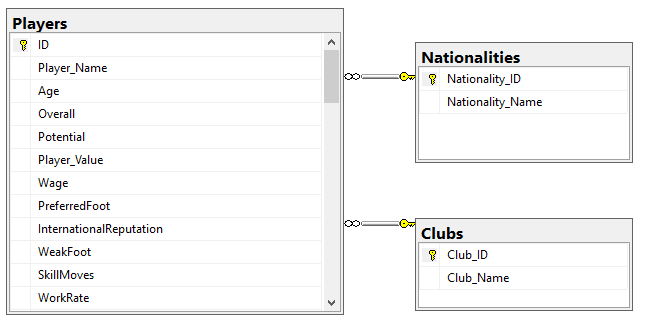

# Trends/Myths/Observations

<a href="#reputation">**Players with higher international reputation usually have higher salaries:** Players who are famous worldwide often get paid more because they bring marketing value to their clubs.</a>

<a href="#potential">**Young players with high potential scores tend to have higher market values:** Young players with high potential are likely to become big stars in the future, increasing their market value.</a>

<a href="#market_value">**Forwards usually have higher market values than players in other positions:** Strikers or forwards who can score goals directly affect the outcomes of games, so they often have high market values.</a>

<a href="#dribbling_and_finishing">**Players with better dribbling and finishing skills have higher values:** Players with good technical skills can make a big difference in games, which increases their market values.</a>

<a href="#composure">**Players with higher composure scores usually have higher salaries:** Composure shows how well players perform under pressure. Players with high composure are valuable because they can handle stressful situations in important games.</a>



<p id="reputation"></p>

In [14]:
# Clearing & Transforming Wage Column
df['Wage'] = df['Wage'].replace('[\€,K]', '', regex=True).astype(float)  # K euro cinsinden varsayıyorum

# Calculation of Correlation between International Reputation and Wage
correlation = df['International Reputation'].corr(df['Wage'])
print("Uluslararası Reputasyon ile Wage arasındaki Korelasyon Katsayısı:", correlation)

# Visual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='International Reputation', y='Wage', data=df)
plt.title('International Reputation vs Wage')
plt.xlabel('International Reputation (1-5 Scale)')
plt.ylabel('Wage (€K per week)')
plt.grid(False)
plt.show()

Uluslararası Reputasyon ile Wage arasındaki Korelasyon Katsayısı: 0.6687193015081855


NameError: name 'sns' is not defined

<Figure size 720x432 with 0 Axes>

In [12]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')